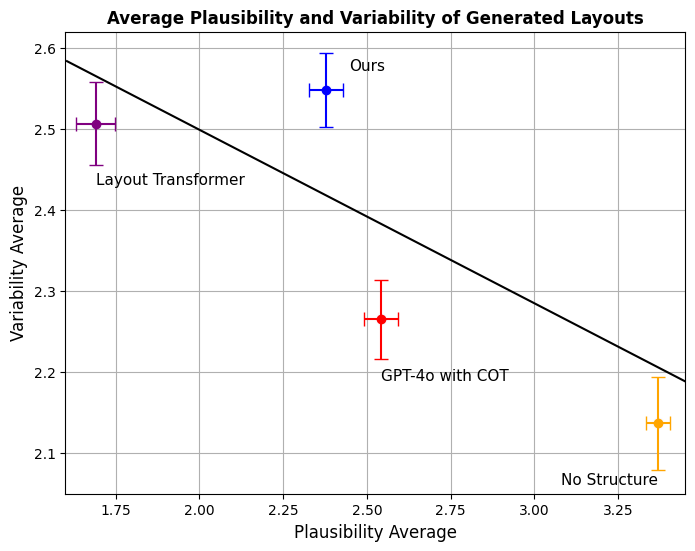

In [146]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
models = ['Layout Transformer', 'Ours', 'GPT-4o with COT', 'No Structure']
colors = ['purple', 'blue', 'red', 'orange']
variability_avg = [2.506666666666667, 2.5483333333333333, 2.265, 2.1366666666666667]  # Y-axis data: Variability Average
plausibility_avg = [1.6905393457117595, 2.37842617152962, 2.541998231653404, 3.3687002652519893]  # X-axis data: Plausibility Average
plausibility_se = [0.057260768175959945, 0.051472873417945264, 0.05054266151889562, 0.0359111548502453]  # X-axis data: Plausibility Standard Error
variability_se = [0.05131529264516826, 0.0457832554705482, 0.04890083503036187, 0.05727112257919764]  # Y-axis data: Variability Standard Error

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot with circle sizes proportional to the log of model size
scatter = ax.scatter(plausibility_avg, variability_avg, s=70, c='blue', alpha=0.01)

# Add text annotations for the models (adjusting the position to avoid overlap)
ax.text(plausibility_avg[0], variability_avg[0]-0.06, models[0], fontsize=11, ha='left', va='top')
ax.text(plausibility_avg[1]+0.07, variability_avg[1]+0.02, models[1], fontsize=11, ha='left', va='bottom')
ax.text(plausibility_avg[2], variability_avg[2]-0.06, models[2], fontsize=11, ha='left', va='top')
ax.text(plausibility_avg[3], variability_avg[3]-0.06, models[3], fontsize=11, ha='right', va='top')

# Draw a line between two points (for example, between "Ours" and "Layout Transformer")
x1, y1 = plausibility_avg[0] - 0.0855, variability_avg[0] + 0.077  # Coordinates of "Ours"
x2, y2 = plausibility_avg[3] + 0.09, variability_avg[3] + 0.05  # Coordinates of "Layout Transformer"

# Plot the line between "Ours" and "Layout Transformer"
ax.plot([x1, x2], [y1, y2], color='black', linestyle='-')  

# Plot error bars for each model (both x and y errors)
for i in range(len(models)):
    ax.errorbar(plausibility_avg[i], variability_avg[i], 
                xerr=plausibility_se[i], yerr=variability_se[i], 
                fmt='o', color=colors[i], capsize=5, linestyle='None')
    
# Customize the plot
ax.set_title('Average Plausibility and Variability of Generated Layouts', fontsize=12, fontweight='bold')
ax.set_xlabel('Plausibility Average', fontsize=12)
ax.set_ylabel('Variability Average', fontsize=12)

# # Creating the legend labels
# most_plausible_label = f"Most Plausible: {max(plausibility_avg):.2f}"
# least_plausible_label = f"Least Plausible: {min(plausibility_avg):.2f}"
# most_variable_label = f"Most Variable: {max(variability_avg):.2f}"
# least_variable_label = f"Least Variable: {min(variability_avg):.2f}"

# # Add the legend with the above labels
# ax.legend([most_plausible_label, least_plausible_label, most_variable_label, least_variable_label],
#           loc='lower left', fontsize=10, frameon=True)

# Limit the axes to avoid excessive empty space
ax.set_xlim(1.6, 3.45)
ax.set_ylim(2.05, 2.62)

# Show grid
ax.grid(True)


# Show the plot without grid
plt.show()


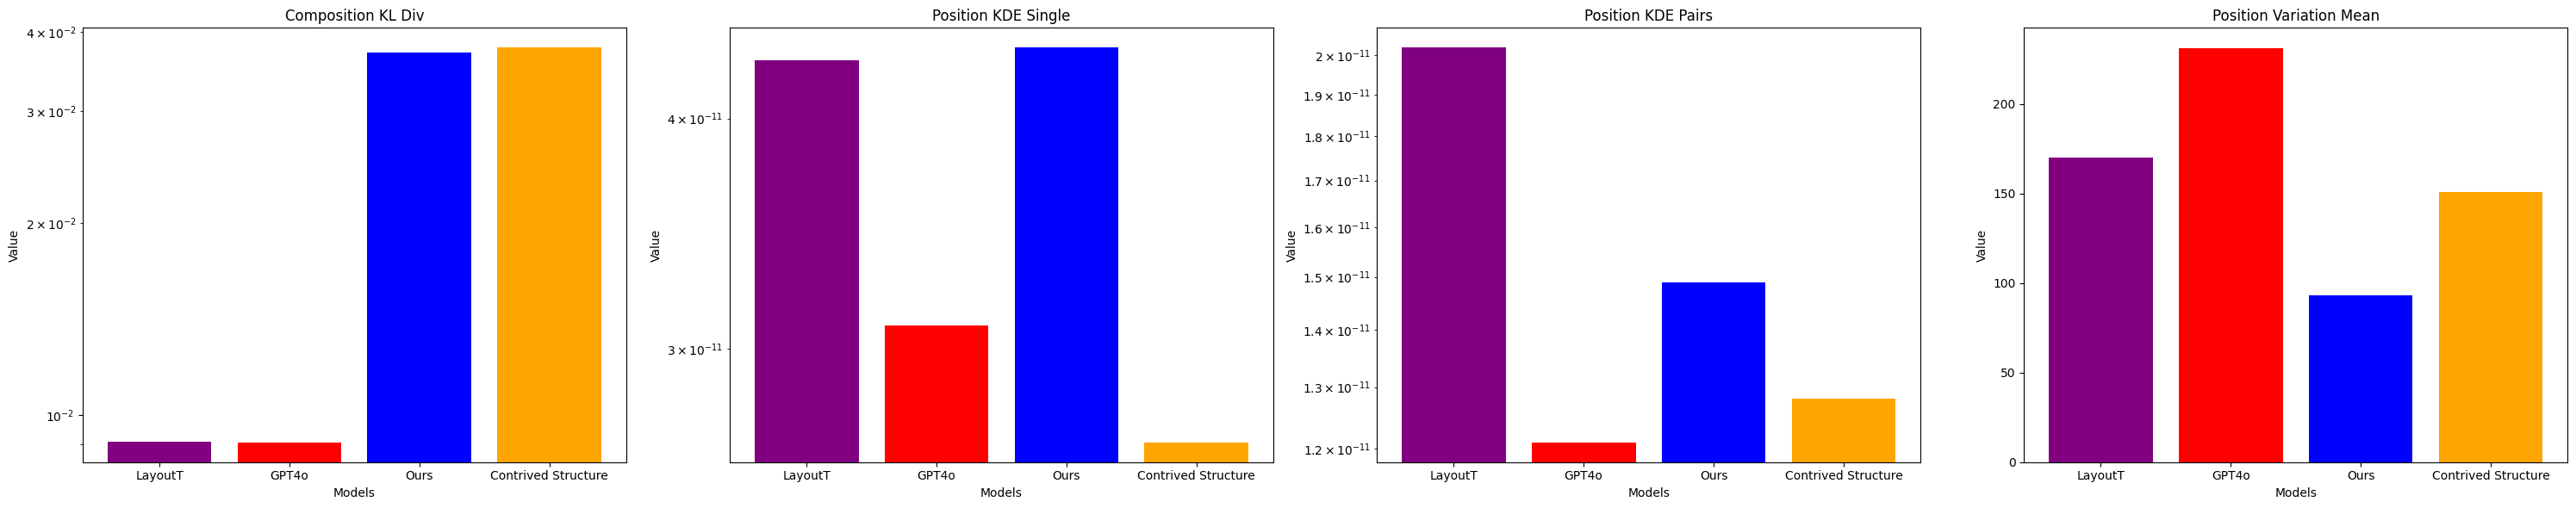

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Data based on the provided table (model names and values)
metrics = [ 'Composition KL Div','Position KDE Single', 'Position KDE Pairs', 'Position Variation Mean']

layout_t = [9.05e-3, 3.09e-11, 1.21e-11, 231]
gpt4o = [37.07e-3, 4.37e-11, 1.49e-11, 93.28]
ours = [9.07e-3, 4.30e-11, 2.02e-11, 170]
contrived_structure = [37.76e-3, 2.67e-11, 1.28e-11, 151]

# Organizing the data into one matrix
data = np.array([ours, layout_t, gpt4o, contrived_structure])

# Colors for each model
colors = ['purple', 'red', 'blue', 'orange']

# Plotting
fig, axes = plt.subplots(1, len(metrics), figsize=(30, 6))  # Arrange bars in a row

for i, metric in enumerate(metrics):
    axes[i].bar(range(4), data[:, i], color=colors, tick_label=['LayoutT', 'GPT4o', 'Ours', 'Contrived Structure'])
    axes[i].set_title(metric)
    axes[i].set_xlabel('Models')
    axes[i].set_ylabel('Value')
    axes[i].set_yscale('log' if i < 3 else 'linear')  # Apply log scale for small values

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

